In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('penguins.csv')
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:
data['species'].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

In [4]:
data['island'].value_counts()

Biscoe       168
Dream        124
Torgersen     52
Name: island, dtype: int64

In [5]:
data.drop(labels='year', axis=1, inplace=True)
data['sex'] = data['sex'].map({'male': 0, 'female': 1})
data['species'] = data['species'].map({'Adelie': 0, 'Gentoo': 1, 'Chinstrap':2})
data['island'] = data['island'].map({'Biscoe': 0, 'Dream': 1, 'Torgersen':2})
data.dropna(inplace=True)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,0.0
1,0,2,39.5,17.4,186.0,3800.0,1.0
2,0,2,40.3,18.0,195.0,3250.0,1.0
4,0,2,36.7,19.3,193.0,3450.0,1.0
5,0,2,39.3,20.6,190.0,3650.0,0.0
...,...,...,...,...,...,...,...
339,2,1,55.8,19.8,207.0,4000.0,0.0
340,2,1,43.5,18.1,202.0,3400.0,1.0
341,2,1,49.6,18.2,193.0,3775.0,0.0
342,2,1,50.8,19.0,210.0,4100.0,0.0


In [6]:
print('Number of data: ', len(data))
if data.duplicated().any() == True:
    data.drop_duplicates(inplace=True)
    print('Duplicate data sets have been deleted.')
    print('Number of data: ', len(data))
else:
    print('There are no duplicate data sets')

Number of data:  333
There are no duplicate data sets


In [7]:
from sklearn import preprocessing
data = np.asarray(data)
X = data[:, 1:]
y = data[:, 0]
X = preprocessing.scale(X[:,1:])

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(233, 5)
(233,)
(100, 5)
(100,)


Text(0, 0.5, 'Error')

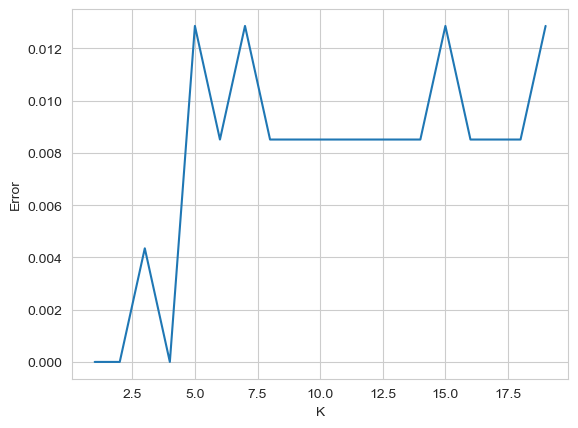

In [9]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(1, 20)
k_error = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k, weights='distance')
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_error.append(1-scores.mean())

plt.plot(k_range, k_error)
plt.xlabel('K')
plt.ylabel('Error')

In [10]:
k = 4
clf = KNeighborsClassifier(n_neighbors=k, weights='distance')
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
right = np.sum(prediction == y_test)
print(right)
wrong = np.sum(prediction != y_test)
print(wrong)

99
1
